# Music Predictor
Using this file to predict the genre of a given music file

In [1]:
from music_dealer import MusicDealer
from models import CnnModel, CrnnLongModel, CrnnModel 
import json
from Paras import Para
import os

In [2]:
WEIGHT_PATH = "../model/"
cnn_dealer = MusicDealer(WEIGHT_PATH + "CnnModel.pt", CnnModel())
crnn_dealer = MusicDealer(WEIGHT_PATH + "CrnnModel.pt", CrnnModel())
lcrnn_dealer = MusicDealer(WEIGHT_PATH + "CrnnLongModel.pt", CrnnLongModel(), 256)

# Sample Music  Paths

In [3]:
data_path = '../sample_music'
genre_path_dict = dict()
label_dict = Para.r_dictionary

for (dirpath, dirnames, filenames) in os.walk(data_path):
    if dirnames:
        for idx, genre in enumerate(dirnames):
            genre_path_dict[genre] = list()
        continue
    else:
        genre = dirpath.split('/')[-1]
        for au_file in filenames:
            if 'mp3' in au_file:
                current_path = dirpath + '/' + au_file
                genre_path_dict[genre].append(current_path)

total_file = sum([len(genre_path_dict[genre]) for genre in genre_path_dict])
total_file, label_dict, genre_path_dict

(30,
 {'pop': 0,
  'metal': 1,
  'disco': 2,
  'blues': 3,
  'reggae': 4,
  'classical': 5,
  'rock': 6,
  'hiphop': 7,
  'country': 8,
  'jazz': 9},
 {'reggae': ['../sample_music/reggae/Shaggy - Oh Carolina 1993 (Official HQ).mp3',
   '../sample_music/reggae/Toots & The Maytals - Do The Reggae.mp3',
   '../sample_music/reggae/John HoltPolice In Helicopter.mp3'],
  'disco': ["../sample_music/disco/The O'Jays - Love Train.mp3",
   '../sample_music/disco/I Will Survive.mp3',
   '../sample_music/disco/The Hues CorporationRock The Boat.mp3'],
  'metal': ['../sample_music/metal/Critical Acclaim.mp3',
   '../sample_music/metal/Tokyo Ghoul - Unravel [Lyrics].mp3',
   '../sample_music/metal/Black Label Society - Bored To Tears (Sonic Brew)Audio.mp3'],
  'blues': ['../sample_music/blues/Big Maceo-Worried Life Blues (1941) HD.mp3',
   "../sample_music/blues/Freddie KingYou've Got To Love Her With Feeling.mp3",
   '../sample_music/blues/Walking Blues - Robert Johnson - The Complete Recordings.mp3

In [4]:
def test_model(dealer, save_name):
    test_result = dict()
    for key in genre_path_dict:
        test_result[key] = 0
        print('test on sample {0}'.format(key))
        for file_name in genre_path_dict.get(key):
            res1, res2, res3, score = dealer.get_genre(file_name)
            if res1 == label_dict.get(key):
                test_result[key] += score.get(res1)
            elif res2 == label_dict.get(key):
                test_result[key] += score.get(res2)
            elif res3 == label_dict.get(key):
                test_result[key] += score.get(res3)
            print("*"*99)
        test_result[key] /= 300
        print(test_result[key])
        print("+"*99)
    with open(Para.LOG_SAVE_FOLD + save_name, 'w+') as f:
        json.dump(test_result, f)
    return

# CNN

In [5]:
test_model(cnn_dealer, 'cnnTest.json')

test on sample reggae
Test on Shaggy - Oh Carolina 1993 (Official HQ).mp3
Genre pop: 47.15%
Genre hiphop: 41.56%
Genre blues: 6.13%
Genre reggae: 5.16%
***************************************************************************************************
Test on Toots & The Maytals - Do The Reggae.mp3
Genre reggae: 98.67%
Genre blues: 1.33%
***************************************************************************************************
Test on John HoltPolice In Helicopter.mp3
Genre reggae: 91.71%
Genre hiphop: 6.19%
Genre blues: 2.1%
***************************************************************************************************
0.6346058600757705
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
test on sample disco
Test on The O'Jays - Love Train.mp3
Genre disco: 78.67%
Genre rock: 19.59%
Genre country: 1.74%
***************************************************************************************************
Test on I Will Survive.

In [6]:
test_model(crnn_dealer, 'crnnTest.json')

test on sample reggae
Test on Shaggy - Oh Carolina 1993 (Official HQ).mp3
Genre blues: 54.42%
Genre hiphop: 19.64%
Genre reggae: 16.68%
Genre pop: 6.96%
Genre disco: 2.29%
***************************************************************************************************
Test on Toots & The Maytals - Do The Reggae.mp3
Genre reggae: 88.05%
Genre blues: 7.78%
Genre country: 2.62%
Genre jazz: 1.55%
***************************************************************************************************
Test on John HoltPolice In Helicopter.mp3
Genre reggae: 89.03%
Genre hiphop: 10.97%
***************************************************************************************************
0.6458689848989448
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
test on sample disco
Test on The O'Jays - Love Train.mp3
Genre disco: 56.02%
Genre rock: 37.68%
Genre reggae: 3.31%
Genre metal: 2.99%
***************************************************************

In [7]:
test_model(lcrnn_dealer, 'lcrnnTest.json')

test on sample reggae
Test on Shaggy - Oh Carolina 1993 (Official HQ).mp3
Genre pop: 73.75%
Genre hiphop: 23.18%
Genre reggae: 3.07%
***************************************************************************************************
Test on Toots & The Maytals - Do The Reggae.mp3
Genre reggae: 96.48%
Genre blues: 3.52%
***************************************************************************************************
Test on John HoltPolice In Helicopter.mp3
Genre reggae: 100.0%
***************************************************************************************************
0.6651951826822047
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
test on sample disco
Test on The O'Jays - Love Train.mp3
Genre disco: 97.87%
Genre blues: 2.13%
***************************************************************************************************
Test on I Will Survive.mp3
Genre disco: 83.81%
Genre pop: 16.19%
************************************

# Make Graphs

In [8]:
import matplotlib.pyplot as plt

In [9]:
with open(Para.LOG_SAVE_FOLD + 'cnnTest.json', 'r') as f:
    cnn = json.load(f)
with open(Para.LOG_SAVE_FOLD + 'crnnTest.json', 'r') as f:
    crnn = json.load(f)
with open(Para.LOG_SAVE_FOLD + 'lcrnnTest.json', 'r') as f:
    lcrnn = json.load(f)

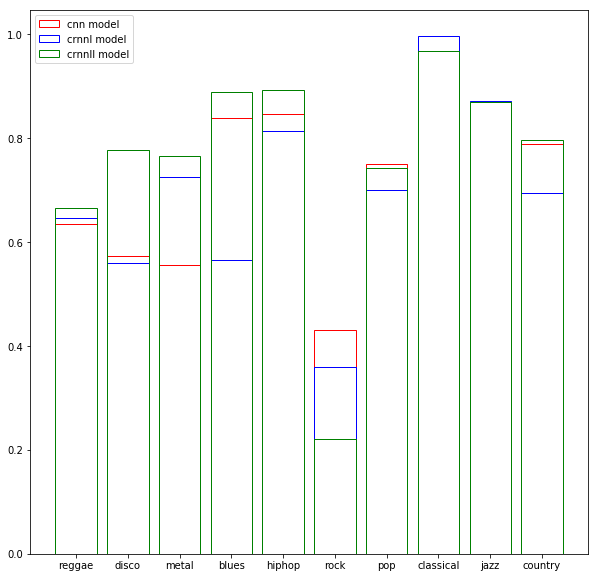

In [10]:
plt.figure(figsize=(10,10))
plt.bar(range(len(cnn)), cnn.values(), 
        align='center', 
        color= (0,0,0,0),
        edgecolor = 'r',
        label='cnn model')

plt.bar(range(len(crnn)), crnn.values(), 
        align='center', 
        color=(0,0,0,0),
        edgecolor = 'b',
        label='crnnI model')

plt.bar(range(len(lcrnn)), lcrnn.values(), 
        align='center', 
        color=(0,0,0,0),
        edgecolor = 'g',
        label='crnnII model')

plt.xticks(range(len(cnn)), cnn.keys())
plt.legend(loc="upper left")
plt.show()